<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Задача: спрогнозировать, уйдёт клиент из  «Бета-Банка» в ближайшее время или нет (Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых). Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.  

Описание проекта
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.


**Описание данных**

*Признаки*
- `RowNumber` — уникальный идентификатор клиента;
- `CustomerId` — фамилия;
- `CreditScore` — кредитный рейтинг;
- `Geography` — страна проживания;
- `Gender` — пол;
- `Age` — возраст;
- `Tenure` — сколько лет человек является клиентом банка;
- `Balance` — баланс на счёте;
- `NumOfProducts` — количество продуктов банка, используемых клиентом;
- `HasCrCard` — наличие кредитной карты;
- `IsActiveMember` — активность клиента;
- `EstimatedSalary` — предполагаемая зарплата;

*Целевой признак*
- `Exited` — факт ухода клиента.


## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score

In [2]:
try:
    data = pd.read_csv('C:/Users/79258/obych_s_y/Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')

Посмотрим размер таблицы и первые 5 строк:

In [3]:
print(data.shape)
print(data.head())

(10000, 14)
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4

Поменяем регистр в названиях колонок

In [4]:
data.columns = [x.lower().replace(' ', '_') for x in data.columns.values]

Данных достаточно много 10 000. Проверим на наличие пустых значений и изучим типы данных.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В слобце с указанием количества лет, в течение которых человек является клиентом банка указано Nan. Заменим пропуски на случайные цифры, для того, чтобы было минимальное влияние на распределение.

In [6]:
data['tenure'] =  data['tenure'].apply(lambda x: random.randint(0,10) if str(x)=='nan' else x)

In [7]:
data['tenure'].value_counts()

1.0     1041
2.0     1038
8.0     1027
3.0     1016
7.0      996
5.0      993
4.0      967
6.0      964
9.0      951
10.0     533
0.0      474
Name: tenure, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


избавимся от неинформативных столбцов 'surname',' rownumber', 'customerid' - они не влияют на результат исследования. Столбец gender категориальный - далее преобразуем его в численные значения.

In [9]:
data = data.drop(['surname','rownumber', 'customerid'], axis=1)

## Исследование задачи

Преобразуем категориальные признаки gender в численные. Чтобы не попасть в дамми ловушку применим drop_first=True

In [10]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [11]:
print(data_ohe.dtypes)

creditscore            int64
age                    int64
tenure               float64
balance              float64
numofproducts          int64
hascrcard              int64
isactivemember         int64
estimatedsalary      float64
exited                 int64
geography_Germany      uint8
geography_Spain        uint8
gender_Male            uint8
dtype: object


разделим начала весь набор данных на тестовую выборку, на которой будем проверять качество выбранной наилучшей модели, и на остальные данные

In [12]:
data_train_valid, data_test = train_test_split(data_ohe, test_size=0.2, random_state=12345) 

теперь из оставшихся данных выберем валидационную выборку, на которой будем выбирать модель.

In [13]:
data_train, data_valid = train_test_split(data_train_valid, test_size=0.25, random_state=12345) 
features_train = data_train.drop(['exited'], axis=1)
target_train = data_train['exited']
features_valid = data_valid.drop(['exited'], axis=1)
target_valid = data_valid['exited']
features_test = data_test.drop(['exited'], axis=1)
target_test = data_test['exited']
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


Данные разделили на 3 выборки: обучающую, валидационную и тестовую. Перейдем к иследованию балансов классов, обучим модель без учёта дисбаланса.

In [14]:
numeric = ['estimatedsalary', 'balance', 'age', 'creditscore', 'numofproducts']

In [15]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.head())

      creditscore       age  tenure   balance  numofproducts  hascrcard  \
492     -0.134048 -0.078068     4.0  0.076163       0.816929          0   
6655    -1.010798  0.494555     1.0  0.136391      -0.896909          1   
4287     0.639554  1.353490     1.0  0.358435      -0.896909          1   
42      -0.990168  2.116987     2.0  0.651725      -0.896909          1   
8178     0.567351  0.685430     7.0  0.813110       0.816929          1   

      isactivemember  estimatedsalary  geography_Germany  geography_Spain  \
492                1         0.331571                  0                0   
6655               1        -0.727858                  0                0   
4287               1        -0.477006                  1                0   
42                 1        -0.100232                  0                0   
8178               1         0.801922                  0                0   

      gender_Male  
492             0  
6655            1  
4287            1  
42    

Обучим модель решающего дерева, посчитаем accuracy.

In [16]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train,target_train)
predictions_valid  = model.predict(features_valid)
accuracy_valid_tree = f1_score(target_valid,predictions_valid)
print(accuracy_valid_tree)

0.4937655860349127


Метрика f1 достаточно низкая, всего 0.47. Чтобы оценить адекватность модели, проверим, как часто в целевом признаке встречается класс «1» или «0». Для начала построим на графике для наглядности

0    0.7963
1    0.2037
Name: exited, dtype: float64


<AxesSubplot:>

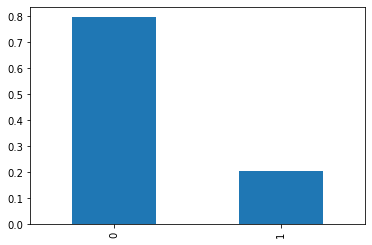

In [17]:
class_frequency = data['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

посчитали f1 и AUC_ROC для модели логистической регрессии, метрики имеют низкие значения. Нужно избавиться от дисбаланса.

## Борьба с дисбалансом

тк у нас есть дисбаланс воспользуемся методами, которые позволяют от него избавиться. Метод upsample:

In [19]:
def upsample(features_valid, target_valid, repeat):
    features_zeros = features_valid[target_valid == 0]
    features_ones = features_valid[target_valid == 1]
    target_zeros = target_valid[target_valid == 0]
    target_ones = target_valid[target_valid == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


Подобрали значние repeat так, чтобы устранился дисбаланс. Проверяем:

In [21]:
target_upsampled.value_counts()

1    4876
0    4781
Name: exited, dtype: int64

При избавлении от дисбаланса метрики f1 и auc-roc выросли, но не достаточно. Посмотрим на модели решающего дерева. F1 в этом случае чуть ниже, при этом значения все равно низкие. 

In [22]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled) 
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

probabilities_tree = model.predict_proba(features_valid)
probabilities_one_tree = probabilities_tree[:, 1]

auc_roc_tree_bal = roc_auc_score(target_valid,probabilities_one_tree)

print("AUC-ROC:", auc_roc_tree_bal)

F1: 0.47483870967741937
AUC-ROC: 0.673143713669433


Рассмотрим модель случайного леса. Найдем кол-во деревьев, при котором метрика f1 наибольшая. 

In [23]:
best_model = None
best_result = 0
best_est = 0
for est in range(10, 100):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_upsampled,target_upsampled) 
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid,predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est
            
    

print("f1 наилучшей модели на валидационной выборке:", best_result, 
      "Количество деревьев:", best_est)

f1 наилучшей модели на валидационной выборке: 0.6030013642564802 Количество деревьев: 55


посчитаем f1 и AUC-ROC

In [24]:
                                              
model = RandomForestClassifier(random_state=12345, n_estimators=65)
model.fit(features_upsampled, target_upsampled) 
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

probabilities_rand = model.predict_proba(features_valid)
probabilities_one_rand = probabilities_rand[:, 1]

auc_roc_random_bal = roc_auc_score(target_valid,probabilities_one_rand)

print("AUC-ROC:", auc_roc_random_bal)

F1: 0.584958217270195
AUC-ROC: 0.841170748300401


при использовании метода upsample, c подобранными параметрами модель случайного леса дала нужный уровень метрики f1 и auc-roc в данном случае имеет высокое значение. Также проверим модель случайного леса c методом class_weight='balanced'.

In [25]:
model = RandomForestClassifier(random_state=12345, n_estimators=65, class_weight = 'balanced')
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

probabilities_rand = model.predict_proba(features_valid)
probabilities_one_rand = probabilities_rand[:, 1]

auc_roc_random_bal = roc_auc_score(target_valid,probabilities_one_rand)

print("AUC-ROC:", auc_roc_random_bal)

F1: 0.5585874799357946
AUC-ROC: 0.8440517612725096


Значения f1 уменьшилась. 
Итого наилучшее значение f1 получилось при использовании модели cлучайного дерева с 65 деревом, избавляясь от дисбаланса методом upsampling

## Тестирование модели

Протестируем выбранную модель на тестовой выборке:

In [26]:
model = RandomForestClassifier(random_state=12345, n_estimators=65)
model.fit(features_upsampled, target_upsampled) 
predicted_test=model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))

F1: 0.6038709677419355


Таким образом, выбранная модель Случайного леса показала высокую точность на тестовой выборке. 

In [27]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test,probabilities_one_test)

print(auc_roc)

0.8489439025951693


Метрика AUC-ROC также получилась высокой.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика AUC-ROC